# Skin Detection

Skin detection using Bayesian decision and Gaussian model fitting

# Prepare data

In [14]:
import os
import glob
import numpy as np
import cv2 as cv
from random import *
from PIL import Image
from tqdm import trange
from tqdm import tnrange, tqdm_notebook
from time import sleep
import matplotlib
import matplotlib.pyplot as plt

In [15]:
originalPath='./original/'
maskPath='./mask/'
originalFile=os.listdir(originalPath)
maskFile=os.listdir(maskPath)

In [74]:
# cross validation 위해 설정
set0 = originalFile[0::10]
set1 = originalFile[1::10]
set2 = originalFile[2::10]
set3 = originalFile[3::10]
set4 = originalFile[4::10]
set5 = originalFile[5::10]
set6 = originalFile[6::10]
set7 = originalFile[7::10]
set8 = originalFile[8::10]
set9 = originalFile[9::10]

In [75]:
set0img, set1img, set2img, set3img, set4img, set5img, set6img, set7img, set8img, set9img = [],[],[],[],[],[],[],[],[],[]
set0mask, set1mask, set2mask, set3mask, set4mask, set5mask, set6mask, set7mask, set8mask, set9mask = [],[],[],[],[],[],[],[],[],[]

for item in set0:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set0mask.append(maimg)
    set0img.append(oriimg)
for item in set1:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set1mask.append(maimg)
    set1img.append(oriimg)
for item in set2:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set2mask.append(maimg)
    set2img.append(oriimg)
for item in set3:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set3mask.append(maimg)
    set3img.append(oriimg)
for item in set4:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set4mask.append(maimg)
    set4img.append(oriimg)
for item in set5:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set5mask.append(maimg)
    set5img.append(oriimg)
for item in set6:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set6mask.append(maimg)
    set6img.append(oriimg)
for item in set7:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set7mask.append(maimg)
    set7img.append(oriimg)
for item in set8:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set8mask.append(maimg)
    set8img.append(oriimg)
for item in set9:
    mapath = maskPath + item
    oripath = originalPath + item
    maimg = cv.imread(mapath,0)
    oriimg = cv.imread(oripath)
    set9mask.append(maimg)
    set9img.append(oriimg)
    
np.save('set0img.npy',set0img)
np.save('set0mask.npy',set0mask)
np.save('set1img.npy',set1img)
np.save('set1mask.npy',set1mask)
np.save('set2img.npy',set2img)
np.save('set2mask.npy',set2mask)
np.save('set3img.npy',set3img)
np.save('set3mask.npy',set3mask)
np.save('set4img.npy',set4img)
np.save('set4mask.npy',set4mask)
np.save('set5img.npy',set5img)
np.save('set5mask.npy',set5mask)
np.save('set6img.npy',set6img)
np.save('set6mask.npy',set6mask)
np.save('set7img.npy',set7img)
np.save('set7mask.npy',set7mask)
np.save('set8img.npy',set8img)
np.save('set8mask.npy',set8mask)
np.save('set9img.npy',set9img)
np.save('set9mask.npy',set9mask)


#data = np.load('skin_R.npy')

# Cross Validation

In [7]:
# cross validation
trainingset = []
testingset = []
tr_i = randint(0,9)
if tr_i == 0:
    trainingset = set0 + set1 + set2 + set3 + set4 + set5 + set6
    testingset = set7 + set8 + set9
elif tr_i == 1:
    trainingset = set1 + set2 + set3 + set4 + set5 + set6 + set7
    testingset = set8 + set9 + set0 
elif tr_i == 2:
    trainingset = set2 + set3 + set4 + set5 + set6 + set7 + set8
    testingset = set9 + set0 + set1
elif tr_i == 3:
    trainingset = set3 + set4 + set5 + set6 + set7 + set8 + set9
    testingset = set0 + set1 + set2
elif tr_i == 4:
    trainingset = set4 + set5 + set6 + set7 + set8 + set9 + set0
    testingset = set1 + set2 + set3
elif tr_i == 5:
    trainingset = set5 + set6 + set7 + set8 + set9 + set0 + set1
    testingset = set2 + set3 + set4
elif tr_i == 6:
    trainingset = set6 + set7 + set8 + set9 + set0 + set1 + set2
    testingset = set3 + set4 + set5
elif tr_i == 7:
    trainingset = set7 + set8 + set9 + set0 + set1 + set2 + set3
    testingset = set4 + set5 + set6
elif tr_i == 8:
    trainingset = set8 + set9 + set0 + set1 + set2 + set3 + set4
    testingset = set5 + set6 + set7
elif tr_i == 9:
    trainingset = set9 + set0 + set1 + set2 + set3 + set4 + set5
    testingset = set6 + set7 + set8
print(tr_i)

6


# Training data visualization

Text(0.5,0.98,'Non-skin')

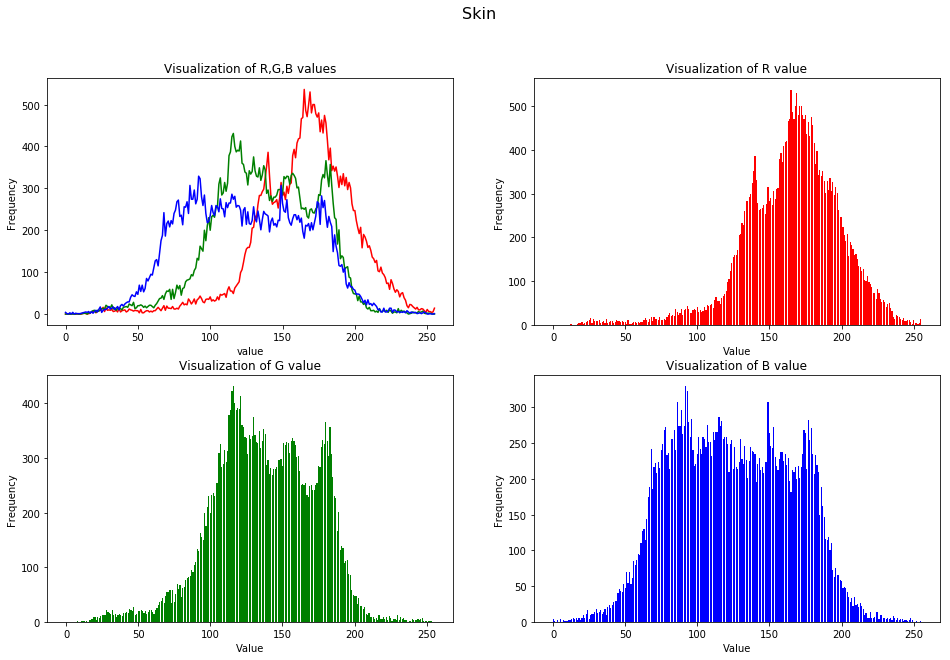

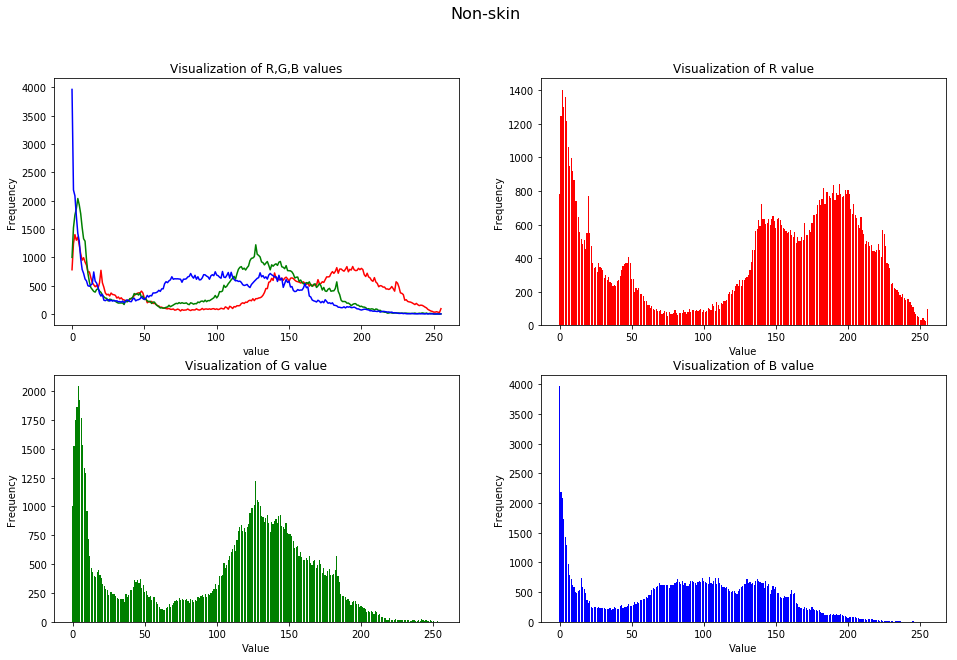

In [34]:
# 데이터 시각화
x = np.arange(0,256)

print(skin_n, nonskin_n)
fig1,[[ax0, ax1], [ax2, ax3]] = plt.subplots(nrows=2,ncols=2, figsize=(16, 10))
ax0.plot(x,skin_R,'r')
ax0.plot(x,skin_G,'g')
ax0.plot(x,skin_B,'b')
ax0.set(title='Visualization of R,G,B values',xlabel='value',ylabel='Frequency')

ax1.bar(x,skin_R, color='red')
ax1.set(title='Visualization of R value', xlabel='Value', ylabel='Frequency')

ax2.bar(x,skin_G, color='green')
ax2.set(title='Visualization of G value', xlabel='Value', ylabel='Frequency')

ax3.bar(x,skin_B, color='blue')
ax3.set(title='Visualization of B value', xlabel='Value', ylabel='Frequency')
fig1.suptitle('Skin', fontsize=16)

fig2,[[ax4, ax5], [ax6, ax7]] = plt.subplots(nrows=2,ncols=2, figsize=(16, 10))
ax4.plot(x,nonskin_R,'r')
ax4.plot(x,nonskin_G,'g')
ax4.plot(x,nonskin_B,'b')
ax4.set(title='Visualization of R,G,B values',xlabel='value',ylabel='Frequency')

ax5.bar(x,nonskin_R, color='red')
ax5.set(title='Visualization of R value', xlabel='Value', ylabel='Frequency')

ax6.bar(x,nonskin_G, color='green')
ax6.set(title='Visualization of G value', xlabel='Value', ylabel='Frequency')

ax7.bar(x,nonskin_B, color='blue')
ax7.set(title='Visualization of B value', xlabel='Value', ylabel='Frequency')
fig2.suptitle('Non-skin', fontsize=16)

# 1. Skin detection
based on Bayesian decision rule by finding a pmf of likelihood and defining a prior

In [109]:
iteration = trange(10)
bayesR=np.zeros((10,256))
bayesRGB=np.zeros((10,256,256,256))
for i in iteration:
    # cross validation
    trainingset = []
    testingset = []

    tr_i = randint(0,9)
    if tr_i == 0:
        trainingset = set0 + set1 + set2 + set3 + set4 + set5 + set6
        testingset = set7 + set8 + set9
    elif tr_i == 1:
        trainingset = set1 + set2 + set3 + set4 + set5 + set6 + set7
        testingset = set8 + set9 + set0 
    elif tr_i == 2:
        trainingset = set2 + set3 + set4 + set5 + set6 + set7 + set8
        testingset = set9 + set0 + set1
    elif tr_i == 3:
        trainingset = set3 + set4 + set5 + set6 + set7 + set8 + set9
        testingset = set0 + set1 + set2
    elif tr_i == 4:
        trainingset = set4 + set5 + set6 + set7 + set8 + set9 + set0
        testingset = set1 + set2 + set3
    elif tr_i == 5:
        trainingset = set5 + set6 + set7 + set8 + set9 + set0 + set1
        testingset = set2 + set3 + set4
    elif tr_i == 6:
        trainingset = set6 + set7 + set8 + set9 + set0 + set1 + set2
        testingset = set3 + set4 + set5
    elif tr_i == 7:
        trainingset = set7 + set8 + set9 + set0 + set1 + set2 + set3
        testingset = set4 + set5 + set6
    elif tr_i == 8:
        trainingset = set8 + set9 + set0 + set1 + set2 + set3 + set4
        testingset = set5 + set6 + set7
    elif tr_i == 9:
        trainingset = set9 + set0 + set1 + set2 + set3 + set4 + set5
        testingset = set6 + set7 + set8
    
    # 이미지 읽어서 R,G,B 값 저장
    skin_RGB = np.zeros((256,256,256))
    nonskin_RGB = np.zeros((256,256,256))
    skin_R,skin_G,skin_B=np.zeros(256,dtype=int),np.zeros(256,dtype=int),np.zeros(256,dtype=int)
    nonskin_R,nonskin_G,nonskin_B=np.zeros(256,dtype=int),np.zeros(256,dtype=int),np.zeros(256,dtype=int)
    skin_n = 0
    nonskin_n =0
    # mask 안, 밖 픽셀 값 저장
    for item in trainingset:
        mapath = maskPath + item
        oripath = originalPath + item
        maimg = cv.imread(mapath,0)
        oriimg = cv.imread(oripath)
        height = oriimg.shape[0]
        width = oriimg.shape[1]
        #BGR
        for h in range(height):
            for w in range(width):
                b = oriimg[h, w, 0].astype(np.int)
                g = oriimg[h, w, 1].astype(np.int)
                r = oriimg[h, w, 2].astype(np.int)

                if maimg[h,w] == 255:
                    skin_R[r] += 1
                    skin_G[g] += 1
                    skin_B[b] += 1
                    skin_RGB[r,g,b] += 1
                    skin_n += 1
                else:
                    nonskin_R[r] += 1
                    nonskin_G[g] += 1
                    nonskin_B[b] += 1
                    nonskin_RGB[r,g,b] += 1
                    nonskin_n += 1
                    
                    

    P_skin = skin_n/(skin_n+nonskin_n)
    probr = 0.0
    prob = 0.0
    
    f=open('./results/bayes probabilityR'+str(i)+'.txt','w')
    for r in range(256):
        if skin_R[r] == 0.0:
            probr= 0
            continue
        else:
            probr = (skin_R[r]*P_skin)/(skin_R[r]+nonskin_R[r])
        bayesR[i,r] = probr
        f.write(str(probr)+'\n')    
    
    f=open('./results/bayes probabilityRGB'+str(i)+'.txt','w')
    for r in range(256):
        for g in range(256):
            for b in range(256):
                if skin_RGB[r,g,b] == 0.0 and nonskin_RGB[r,g,b] == 0.0:
                    prob = 0
                    continue
                else:
                    prob = (skin_RGB[r,g,b]*P_skin)/(skin_RGB[r,g,b]+nonskin_RGB[r,g,b])
                bayesRGB[i,r,g,b] = prob
                f.write(str(prob)+'\n')
                
    sleep(0.1)








  0%|          | 0/10 [00:00<?, ?it/s]






 10%|█         | 1/10 [23:36<3:32:29, 1416.66s/it]






 20%|██        | 2/10 [46:51<3:07:26, 1405.83s/it]






 30%|███       | 3/10 [1:09:55<2:43:09, 1398.51s/it]






 40%|████      | 4/10 [1:32:31<2:18:47, 1387.97s/it]






 50%|█████     | 5/10 [1:55:01<1:55:01, 1380.35s/it]






 60%|██████    | 6/10 [2:16:51<1:31:14, 1368.65s/it]






 70%|███████   | 7/10 [2:39:40<1:08:25, 1368.58s/it]






 80%|████████  | 8/10 [3:00:49<45:12, 1356.19s/it]  






 90%|█████████ | 9/10 [3:21:49<22:25, 1345.45s/it]






100%|██████████| 10/10 [3:42:57<00:00, 1337.71s/it]








# Capute precision and recall

In [116]:
bayesR_mean = np.zeros(256)
bayesRGB_mean = np.zeros((256,256))
bayesR_mean =  (bayesR[0] + bayesR[1] + bayesR[2] + bayesR[3] + bayesR[4] + bayesR[5] + bayesR[6] + bayesR[7] + bayesR[8] + bayesR[9]) / 10
bayesRGB_mean =  (bayesRGB[0] + bayesRGB[1] + bayesRGB[2] + bayesRGB[3] + bayesRGB[4] + bayesRGB[5] + bayesRGB[6] + bayesRGB[7] + bayesRGB[8] + bayesRGB[9]) / 10



In [144]:
# precisionR recallR precisionRGB recallRGB 순
pre_rec = np.zeros((280,4))
count = 0
f=open('./bayesoutputmask/precision&recall.txt','w')
for item in testingset:
    temapath = maskPath + item
    teoripath = originalPath + item
    maimg = cv.imread(temapath,0)
    oriimg = cv.imread(teoripath)
    height = oriimg.shape[0]
    width = oriimg.shape[1]
    tpR, fpR, fnR, tpRGB, fpRGB, fnRGB = 0,0,0,0,0,0
    precisionR, precisionRGB, recallR, recallRGB = 0.0,0.0,0.0,0.0
    
    outmaskR = np.zeros((height,width))
    outmaskRGB = np.zeros((height,width))
    tpmaskR = np.zeros((height,width))
    tpmaskRGB = np.zeros((height,width))
    fpmaskR = np.zeros((height,width))
    fpmaskRGB = np.zeros((height,width))
    fnmaskR = np.zeros((height,width))
    fnmaskRGB = np.zeros((height,width))
    
    #BGR
    for h in range(height):
        for w in range(width):
            b = oriimg[h, w, 0].astype(np.int)
            g = oriimg[h, w, 1].astype(np.int)
            r = oriimg[h, w, 2].astype(np.int)

            if bayesR_mean[r] > 0.03:
                outmaskR[h,w] = 255
            if bayesRGB_mean[r,g,b] > 0.03:
                outmaskRGB[h,w] = 255
                
#            matplotlib.image.imsave('bayesoutputmask/'+str(item)+'_R.png', ((outmaskR/(255))))
#            matplotlib.image.imsave('bayesoutputmask/'+str(item)+'_RGB.png', ((outmaskRGB/(255))))

    tpmaskR = np.multiply(maimg,outmaskR) / 255
    tpmaskRGB = np.multiply(maimg,outmaskRGB) / 255
    tpR = np.sum(tpmaskR)
    tpRGB = np.sum(tpmaskRGB)
    fpmaskR = outmaskR - tpmaskR
    fpmaskRGB = outmaskRGB  -  tpmaskRGB
    fpR = np.sum(fpmaskR)
    fpRGB = np.sum(fpmaskRGB)
    precisionR = tpR/(tpR+fpR)
    precisionRGB = tpRGB/(tpRGB+fpRGB)
    fnmaskR = maimg - tpmaskR
    fnmaskRGB = maimg - tpmaskRGB
    fnR = np.sum(fnmaskR)
    fnRGB = np.sum(fnmaskRGB)
    recallR = tpR/(tpR+fnR)
    recallRGB = tpRGB/(tpRGB+fnRGB)
            
    pre_rec[count] = precisionR, recallR, precisionRGB, recallRGB
    print(precisionR, recallR, precisionRGB, recallRGB)
    cv.imwrite('./bayesoutputmask/'+str(item)+'_R.png',outmaskR)
    cv.imwrite('./bayesoutputmask/'+str(item)+'_RGB.png',outmaskRGB)        
    f.write(str(item)+'\n'+str(pre_rec[count])+'\n')    

    count += 1
f.close()

0.3605093407053699 0.708985469043461 0.6374371596145789 0.8021681109756499
0.5577234787087392 0.9204019899502512 0.6699556502905077 0.9743256418589535
0.25344839711068023 0.7802554665512016 0.6834990059642148 0.9038134413756843
0.11954660360433825 0.6959411345834322 0.12322692342739118 0.9629717540944694
0.23633693215491253 0.8359460444768502 0.37749553328672414 0.8858002187386074
0.20698445698445697 0.7521359834517493 0.4491307926976902 0.8341577479989207
0.1316496824693546 0.791089811856585 0.38462128181539407 0.8904863329783458
0.1572338714665677 0.8920341560416423 0.4887559463745135 0.7931921862206106
0.40134346295819384 0.8169943206640454 0.6697964868143222 0.6513324595893403
0.5149305289015123 0.7871853546910755 0.6630563478822453 0.963856128615854
0.3750416679293312 0.5684104165709825 0.7428194677535364 0.7115004822486566
0.14912138503436648 0.8447199265381083 0.3322721707189085 0.8721763085399449
0.6157399814116232 0.8808577201329597 0.8638169690884314 0.7849964153033957
0.4811

0.3913387803982925 0.815078550882063 0.8588850174216028 0.14875384708225212
0.11405260126703783 0.5246842709529277 0.33107852412488176 0.6181224057228649
0.08914527978251724 0.6715835669876874 0.11823783416622193 0.5941728635864928
0.06642444194636261 0.8156943303204601 0.2647946647946648 0.9298274445357436
0.4483690280065898 0.9241300627495722 0.8493457943925233 0.9257599217667671
0.6985260717698103 0.9003472502624565 0.756809678660093 0.8739400791407574
0.38382327561410573 0.7706167706167706 0.4826676956717474 0.8668283668283668
0.3642265788256313 0.6736391798200324 0.5815607967973762 0.7114618675320844
0.15762925598991173 0.6439541213063764 0.4796137902083224 0.8884136858475894
0.21467371084158046 0.6080404657779651 0.3577032005814682 0.7519890405184678
0.5244485147726368 0.5719931383406076 0.6556774881877763 0.9341193841877836
0.207187717159003 0.7368617393331779 0.5641863107071855 0.9263231522499417
0.21662337662337663 0.5861851672321862 0.5817807024498534 0.7113911778962676
0.409

0.816997980947735 0.7560789034774212 0.8614051140016816 0.8736440816121791
0.0821002821002821 0.854679802955665 0.10410753385775687 0.9729064039408867
0.0419583796050408 0.8491303498143443 0.31145130022060297 0.9104944303302717
0.5177770338131905 0.8082712006131977 0.6646921558068569 0.7740923977423176
0.3856588123415047 0.5894857973472231 0.4289221395932264 0.9664667999111703
0.8972356857523303 0.6952602644742707 0.9386568891667441 0.9171247915738036
0.15940060987230797 0.8656446083187787 0.5357795186102204 0.8538715311469047
0.5749655579610313 0.5555893651820014 0.7168625795557865 0.839697995511772
0.04388342750144246 0.819475503151047 0.09838450348365363 0.7836958731449482
0.1967438755071645 0.7934548467274234 0.5650986431124154 0.8056752278376139
0.19750656167979003 0.73992133726647 0.3048588545897644 0.7380162241887905
0.2889108309281483 0.748750049210661 0.6278741865509762 0.6837132396362348
0.39075087399300806 0.6804976507180199 0.4210693825588797 0.7441929720071471
0.4751411869

IndexError: index 280 is out of bounds for axis 0 with size 280

R에 대한 precision, recall 과 RGB에 대한 precision, recall

In [236]:
print(str(pre_rec[0]))
print(pre_rec.mean(axis=0))

[0.36050934 0.70898547 0.63743716 0.80216811]
[0.26886277 0.72319941 0.45499753 0.80442426]


# 2. Skin detection
based on pdf for Gaussian model fitting

전체적인 R, G, B 값에 대한 visualization








  0%|          | 0/10 [00:00<?, ?it/s]

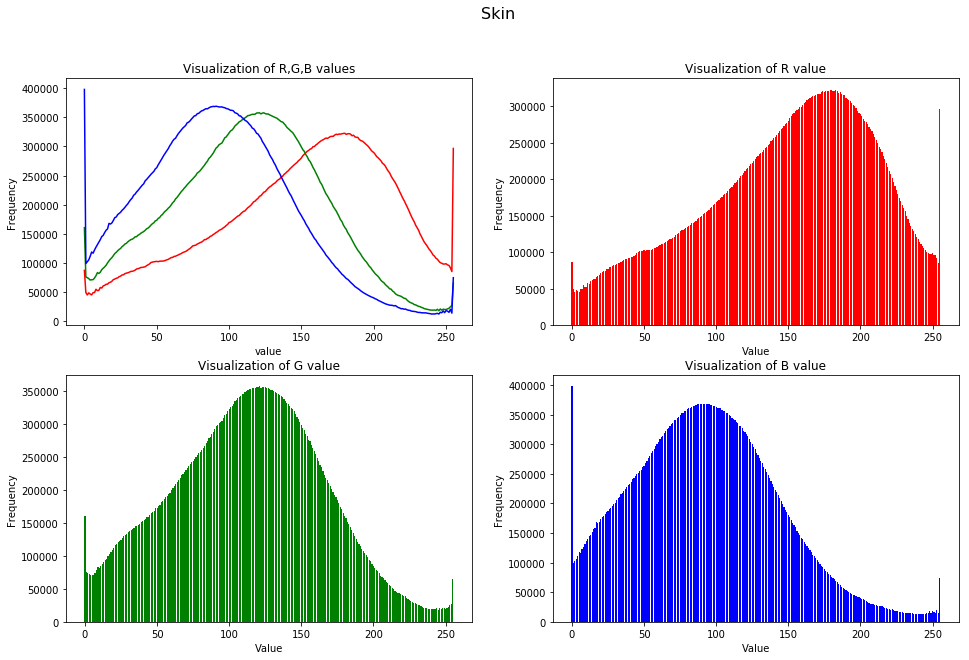

In [145]:
skin_RGBall = np.zeros((256,256,256))
skin_Rall,skin_Gall,skin_Ball = np.zeros(256,dtype=int),np.zeros(256,dtype=int),np.zeros(256,dtype=int)
skin_n = 0
iteration = trange(10)

for i in iteration:
    # cross validation
    trainingset = []
    testingset = []

    tr_i = randint(0,9)
    if tr_i == 0:
        trainingset = set0 + set1 + set2 + set3 + set4 + set5 + set6
        testingset = set7 + set8 + set9
    elif tr_i == 1:
        trainingset = set1 + set2 + set3 + set4 + set5 + set6 + set7
        testingset = set8 + set9 + set0 
    elif tr_i == 2:
        trainingset = set2 + set3 + set4 + set5 + set6 + set7 + set8
        testingset = set9 + set0 + set1
    elif tr_i == 3:
        trainingset = set3 + set4 + set5 + set6 + set7 + set8 + set9
        testingset = set0 + set1 + set2
    elif tr_i == 4:
        trainingset = set4 + set5 + set6 + set7 + set8 + set9 + set0
        testingset = set1 + set2 + set3
    elif tr_i == 5:
        trainingset = set5 + set6 + set7 + set8 + set9 + set0 + set1
        testingset = set2 + set3 + set4
    elif tr_i == 6:
        trainingset = set6 + set7 + set8 + set9 + set0 + set1 + set2
        testingset = set3 + set4 + set5
    elif tr_i == 7:
        trainingset = set7 + set8 + set9 + set0 + set1 + set2 + set3
        testingset = set4 + set5 + set6
    elif tr_i == 8:
        trainingset = set8 + set9 + set0 + set1 + set2 + set3 + set4
        testingset = set5 + set6 + set7
    elif tr_i == 9:
        trainingset = set9 + set0 + set1 + set2 + set3 + set4 + set5
        testingset = set6 + set7 + set8
    
    # 이미지 읽어서 R,G,B 값 저장
    skin_RGB = np.zeros((256,256,256))
    skin_R,skin_G,skin_B=np.zeros(256,dtype=int),np.zeros(256,dtype=int),np.zeros(256,dtype=int)
    skin_n = 0
    # mask 안, 밖 픽셀 값 저장
    for item in trainingset:
        mapath = maskPath + item
        oripath = originalPath + item
        maimg = cv.imread(mapath,0)
        oriimg = cv.imread(oripath)
        height = oriimg.shape[0]
        width = oriimg.shape[1]
        #BGR
        for h in range(height):
            for w in range(width):
                b = oriimg[h, w, 0].astype(np.int)
                g = oriimg[h, w, 1].astype(np.int)
                r = oriimg[h, w, 2].astype(np.int)

                if maimg[h,w] == 255:
                    skin_R[r] += 1
                    skin_G[g] += 1
                    skin_B[b] += 1
                    skin_RGB[r,g,b] += 1
                    skin_n += 1


                    
    x = np.arange(0,256)

    fig1,[[ax0, ax1], [ax2, ax3]] = plt.subplots(nrows=2,ncols=2, figsize=(16, 10))
    ax0.plot(x,skin_R,'r')
    ax0.plot(x,skin_G,'g')
    ax0.plot(x,skin_B,'b')
    ax0.set(title='Visualization of R,G,B values',xlabel='value',ylabel='Frequency')

    ax1.bar(x,skin_R, color='red')
    ax1.set(title='Visualization of R value', xlabel='Value', ylabel='Frequency')

    ax2.bar(x,skin_G, color='green')
    ax2.set(title='Visualization of G value', xlabel='Value', ylabel='Frequency')

    ax3.bar(x,skin_B, color='blue')
    ax3.set(title='Visualization of B value', xlabel='Value', ylabel='Frequency')
    fig1.suptitle('Skin', fontsize=16)

                    
                    
    break
                    

# Gaussian fitting

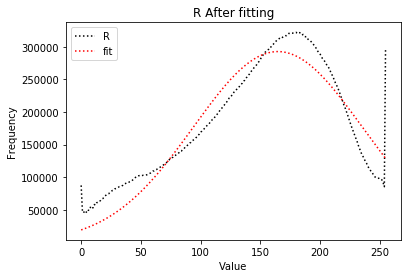

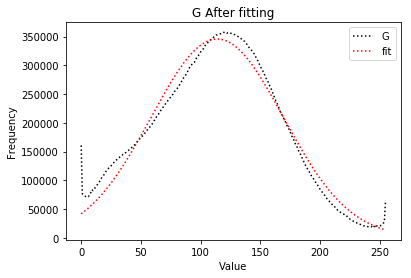

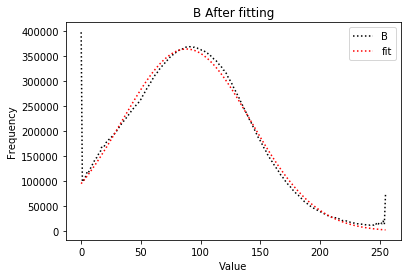

In [171]:
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

n = len(x)
meanR = sum(x*skin_R)/sum(skin_R)
sigmaR = np.sqrt(sum(skin_R * (x - mean)**2) / sum(skin_R))
meanG = sum(x*skin_G)/sum(skin_G)
sigmaG = np.sqrt(sum(skin_G * (x - mean)**2) / sum(skin_G))
meanB = sum(x*skin_B)/sum(skin_B)
sigmaB = np.sqrt(sum(skin_B * (x - mean)**2) / sum(skin_B))

def Gauss(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

#propt : array,오차 제곱의 합이 최소가 되는 파라미터의 최적의 값
#pcov : 2d array, popt의 추측 공분산
poptR,pcovR = curve_fit(Gauss,x,skin_R,p0=[max(skin_R),meanR,sigmaR])
poptG,pcovG = curve_fit(Gauss,x,skin_G,p0=[max(skin_G),meanG,sigmaG])
poptB,pcovB = curve_fit(Gauss,x,skin_B,p0=[max(skin_B),meanB,sigmaB])

plt.plot(x,skin_R,'k:',label='R')
plt.plot(x,Gauss(x,*poptR),'r:',label='fit')
plt.legend()
plt.title('R After fitting')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.plot(x,skin_G,'k:',label='G')
plt.plot(x,Gauss(x,*poptG),'r:',label='fit')
plt.legend()
plt.title('G After fitting')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.plot(x,skin_B,'k:',label='B')
plt.plot(x,Gauss(x,*poptB),'r:',label='fit')
plt.legend()
plt.title('B After fitting')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [233]:
print(max(Gauss(x,*poptR))/5*4)
print(max(Gauss(x,*poptG))/5*4)
print(max(Gauss(x,*poptB))/5*4)
M_R = max(Gauss(x,*poptR))/5*4
M_G = max(Gauss(x,*poptG))/5*4
M_B = max(Gauss(x,*poptB))/5*4
c1, c2, c3 = 0,0,0
GMF_R1, GMF_R2, GMF_G1, GMF_G2, GMF_B1, GMF_B2 = 0,0,0,0,0,0

for i in range(256):
    if Gauss(x,*poptR)[i] > M_R and c1 == 0:
        GMF_R1 = i
        c1 = 1
    if Gauss(x,*poptR)[i] > M_R and c1 == 1:
        GMF_R2 = i
        
    if Gauss(x,*poptG)[i] > M_G and c2 == 0:
        GMF_G1 = i
        c2 = 1
    if Gauss(x,*poptG)[i] > M_G and c2 == 1:
        GMF_G2 = i
        
    if Gauss(x,*poptB)[i] > M_B and c3 == 0:
        GMF_B1 = i
        c3 = 1
    if Gauss(x,*poptB)[i] > M_B and c3 == 1:
        GMF_B2 = i        
        
print(GMF_R1, GMF_R2, GMF_G1, GMF_G2, GMF_B1, GMF_B2)

234266.60892413073
276672.6116867916
291385.9021961283
118 211 78 150 53 124


# Compute precision and recall

In [234]:
# precisionR recallR precisionRGB recallRGB 순
pre_recG = np.zeros((280,4))
count = 0
f=open('./gaussianoutputmask/precision&recall.txt','w')
for item in testingset:
    temapath = maskPath + item
    teoripath = originalPath + item
    maimg = cv.imread(temapath,0)
    oriimg = cv.imread(teoripath)
    height = oriimg.shape[0]
    width = oriimg.shape[1]
    tpR, fpR, fnR, tpRGB, fpRGB, fnRGB = 0,0,0,0,0,0
    precisionR, precisionRGB, recallR, recallRGB = 0.0,0.0,0.0,0.0
    
    outmaskR = np.zeros((height,width))
    outmaskRGB = np.zeros((height,width))
    tpmaskR = np.zeros((height,width))
    tpmaskRGB = np.zeros((height,width))
    fpmaskR = np.zeros((height,width))
    fpmaskRGB = np.zeros((height,width))
    fnmaskR = np.zeros((height,width))
    fnmaskRGB = np.zeros((height,width))
    
    #BGR
    for h in range(height):
        for w in range(width):
            b = oriimg[h, w, 0].astype(np.int)
            g = oriimg[h, w, 1].astype(np.int)
            r = oriimg[h, w, 2].astype(np.int)

            if r > GMF_R1 and r < GMF_R2:
                outmaskR[h,w] = 255
                if g > GMF_G1 and g < GMF_G2 and b > GMF_B1 and b < GMF_B2:
                    outmaskRGB[h,w] = 255

                
#            matplotlib.image.imsave('bayesoutputmask/'+str(item)+'_R.png', ((outmaskR/(255))))
#            matplotlib.image.imsave('bayesoutputmask/'+str(item)+'_RGB.png', ((outmaskRGB/(255))))

    tpmaskR = np.multiply(maimg,outmaskR) / 255
    tpmaskRGB = np.multiply(maimg,outmaskRGB) / 255
    tpR = np.sum(tpmaskR)
    tpRGB = np.sum(tpmaskRGB)
    fpmaskR = outmaskR - tpmaskR
    fpmaskRGB = outmaskRGB  -  tpmaskRGB
    fpR = np.sum(fpmaskR)
    fpRGB = np.sum(fpmaskRGB)
    precisionR = tpR/(tpR+fpR)
    precisionRGB = tpRGB/(tpRGB+fpRGB)
    fnmaskR = maimg - tpmaskR
    fnmaskRGB = maimg - tpmaskRGB
    fnR = np.sum(fnmaskR)
    fnRGB = np.sum(fnmaskRGB)
    recallR = tpR/(tpR+fnR)
    recallRGB = tpRGB/(tpRGB+fnRGB)
            
    pre_recG[count] = precisionR, recallR, precisionRGB, recallRGB
    print(precisionR, recallR, precisionRGB, recallRGB)
    cv.imwrite('./gaussianoutputmask/'+str(item)+'_R.png',outmaskR)
    cv.imwrite('./gaussianoutputmask/'+str(item)+'_RGB.png',outmaskRGB)        
    f.write(str(item)+'\n'+str(pre_recG[count])+'\n')    

    count += 1
f.close()



0.3584468611361941 0.3725314183123878 0.40633670455562515 0.1852456340786682
0.322524727235648 0.5068098061208139 0.30797293321565167 0.41932382630988624
0.12414575000787327 0.33924268502581756 0.20217201590225928 0.17943201376936316
0.25809566728899763 0.4148600403580483 0.6746506986027944 0.38474672737620946
0.2299432293271135 0.8574007220216606 0.3726823238566131 0.6926485067279291
0.4989993138151876 0.4180960137983902 0.6140879961225699 0.2731650057493292
0.12153331618214562 0.5033027913914341 0.2893086630022451 0.3981461751544854
0.09829176357366268 0.6188648757826701 0.2867155664221679 0.35528176126035144
0.2154628729761585 0.7566076096427534 0.5708683473389355 0.3699535288992158
0.07082974800245852 0.7869434580715652 0.19219409282700423 0.4976782299918055
0.23433281708854867 0.6200649423356847 0.7085103096764229 0.4109058336132572
0.3380125033559621 0.360649029116281 0.31143588333580086 0.3012911014261453
0.4861802747234384 0.4302955009317597 0.6804435483870968 0.279527908421332

0.48956877493456663 0.5831996367489026 0.6633007644822371 0.49114575450280007
0.3640619954794963 0.9026318422896027 0.5784543325526932 0.7909536675672971
0.1500077273781006 0.47434331093463655 0.26483335053142093 0.3135613927916921
0.20286619399607783 0.28569000679809653 0.2061547508207968 0.17874745071380013
0.2269983948635634 0.5442998999307213 0.3777752605346624 0.256716188130244
0.311592512159664 0.6998145759432441 0.5409185185185185 0.36794582392776526
0.5791267501842299 0.5889737224225959 0.6745307995528622 0.5370274954330414
0.18210058379304805 0.4575427264163639 0.3138200183654729 0.3679181805948055
0.7187550395097565 0.5501620120351798 0.7168789808917198 0.41678753278814995
0.15247119927065778 0.6958769385953852 0.5014122559253347 0.5148152818055731
0.3291679881594249 0.5806355363270177 0.59575456053068 0.3349619573325377
0.5344642629865998 0.510436201986525 0.6683732284532448 0.34231089810377163
0.1838995392365173 0.5219541943352758 0.5910506938544322 0.28282965171432445
0.24

0.2175867422464527 0.6177224272242723 0.3814618489520012 0.4020090200902009
0.6344662168796376 0.805373548892529 0.6659151013765512 0.6993981910120362
0.2897621048659589 0.6757329706811728 0.3689727463312369 0.5209391624335027
0.4388911836247648 0.6879526161814781 0.45668882201389943 0.5058270586542611
0.30706039879853797 0.6763650856915105 0.3629815562588672 0.5302510960542048
0.2993000567521552 0.3480952979632889 0.5188384679433805 0.313364344983656
0.3602006247525188 0.4581848708142897 0.7470400914509676 0.34134875478033766
0.09713688063799189 0.6909485430874147 0.11996314794161858 0.3834469931804092
0.0545547370724236 0.5 0.1676668353698214 0.38753342245989303
0.14715485813916626 0.5304536624385785 0.37552059231837115 0.3709290366815221
0.18298787496755534 0.8696035242290749 0.26684924003834043 0.5723348017621145
0.1804266111136271 0.10648989628996045 0.21884142773551785 0.07997433978402652
0.10440523121206433 0.5656890998474318 0.14591920857378401 0.30005085607730125
0.14437614479

IndexError: index 280 is out of bounds for axis 0 with size 280

In [238]:
print(pre_recG.mean(axis=0))

[0.27452355 0.54575165 0.43139544 0.35540274]


# Naive Gaussian fitting

In [296]:
def fit(function, parameters, y, x = None):
    def f(params):
        i = 0
        for p in parameters:
            p.set(params[i])
            i += 1
        return y - function(x)

    if x is None: x = np.arange(y.shape[0])
    p = [param() for param in parameters]
    return optimize.leastsq(f, p)

<function matplotlib.pyplot.show>

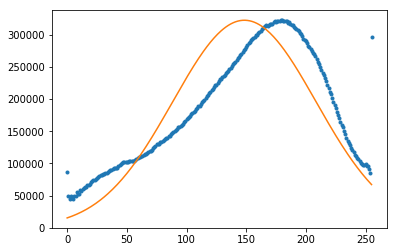

In [297]:
# R에 대해 fitting
plt.plot(skin_R, '.')

XR = np.arange(skin_R.size)
xR = np.sum(X*skin_R)/np.sum(skin_R)
widthR = np.sqrt(np.abs(np.sum((XR-xR)**2*skin_R)/np.sum(skin_R)))

max = skin_R.max()

fitR = lambda t : max*np.exp(-(t-xR)**2/(2*widthR**2))

plt.plot(fitR(XR), '-')
plt.show

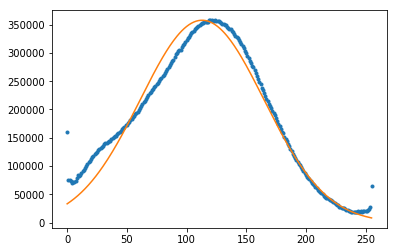

In [298]:
# G에 대해 fitting
plt.plot(skin_G, '.')

XG = np.arange(skin_G.size)
xG = np.sum(XG*skin_G)/np.sum(skin_G)
widthG = np.sqrt(np.abs(np.sum((XG-xG)**2*skin_G)/np.sum(skin_G)))

max = skin_G.max()

fitG = lambda t : max*np.exp(-(t-xG)**2/(2*widthG**2))

plt.plot(fitG(XG), '-')

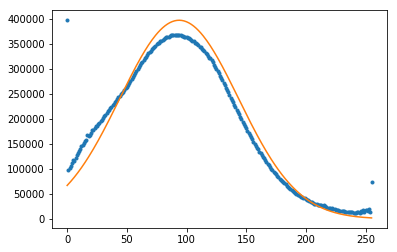

In [299]:
# B에 대해 fitting
plt.plot(skin_B, '.')

XB = np.arange(skin_B.size)
xB = np.sum(XB*skin_B)/np.sum(skin_B)
widthB = np.sqrt(np.abs(np.sum((XB-xB)**2*skin_B)/np.sum(skin_B)))

max = skin_B.max()

fitB = lambda t : max*np.exp(-(t-xB)**2/(2*widthB**2))

plt.plot(fitB(XB), '-')

In [305]:
M_RR = fitR(XR).max(axis=0)/4*3
M_GG = fitG(XG).max(axis=0)/4*3
M_BB = fitB(XB).max(axis=0)/4*3

GMF_RR1, GMF_RR2, cc1 = 0,0,0
GMF_GG1, GMF_GG2, cc2 = 0,0,0
GMF_BB1, GMF_BB2, cc3 = 0,0,0
for i in range(256):
    if fitR(XR)[i] > M_RR and cc1 == 0:
        GMF_RR1 = i
        cc1 = 1
    if fitR(XR)[i]  > M_RR and cc1 == 1:
        GMF_RR2 = i
        
    if fitG(XG)[i] > M_GG and cc2 == 0:
        GMF_GG1 = i
        cc2 = 1
    if fitG(XG)[i]  > M_GG and cc2 == 1:
        GMF_GG2 = i
        
    if fitB(XB)[i] > M_BB and cc3 == 0:
        GMF_BB1 = i
        cc3 = 1
    if fitB(XB)[i]  > M_BB and cc3 == 1:
        GMF_BB2 = i
        
        
print(GMF_RR1,GMF_RR2,GMF_GG1,GMF_GG2,GMF_BB1,GMF_BB2)

103 194 74 152 57 131


# Compute precision and recall

In [306]:
# precisionR recallR precisionRGB recallRGB 순
pre_recG = np.zeros((280,4))
count = 0
f=open('./gaussianoutputmask_me/precision&recall.txt','w')
for item in testingset:
    temapath = maskPath + item
    teoripath = originalPath + item
    maimg = cv.imread(temapath,0)
    oriimg = cv.imread(teoripath)
    height = oriimg.shape[0]
    width = oriimg.shape[1]
    tpR, fpR, fnR, tpRGB, fpRGB, fnRGB = 0,0,0,0,0,0
    precisionR, precisionRGB, recallR, recallRGB = 0.0,0.0,0.0,0.0
    
    outmaskR = np.zeros((height,width))
    outmaskRGB = np.zeros((height,width))
    tpmaskR = np.zeros((height,width))
    tpmaskRGB = np.zeros((height,width))
    fpmaskR = np.zeros((height,width))
    fpmaskRGB = np.zeros((height,width))
    fnmaskR = np.zeros((height,width))
    fnmaskRGB = np.zeros((height,width))
    
    #BGR
    for h in range(height):
        for w in range(width):
            b = oriimg[h, w, 0].astype(np.int)
            g = oriimg[h, w, 1].astype(np.int)
            r = oriimg[h, w, 2].astype(np.int)

            if r > GMF_RR1 and r < GMF_RR2:
                outmaskR[h,w] = 255
                if g > GMF_GG1 and g < GMF_GG2 and b > GMF_BB1 and b < GMF_BB2:
                    outmaskRGB[h,w] = 255

                
#            matplotlib.image.imsave('bayesoutputmask/'+str(item)+'_R.png', ((outmaskR/(255))))
#            matplotlib.image.imsave('bayesoutputmask/'+str(item)+'_RGB.png', ((outmaskRGB/(255))))

    tpmaskR = np.multiply(maimg,outmaskR) / 255
    tpmaskRGB = np.multiply(maimg,outmaskRGB) / 255
    tpR = np.sum(tpmaskR)
    tpRGB = np.sum(tpmaskRGB)
    fpmaskR = outmaskR - tpmaskR
    fpmaskRGB = outmaskRGB  -  tpmaskRGB
    fpR = np.sum(fpmaskR)
    fpRGB = np.sum(fpmaskRGB)
    precisionR = tpR/(tpR+fpR)
    precisionRGB = tpRGB/(tpRGB+fpRGB)
    fnmaskR = maimg - tpmaskR
    fnmaskRGB = maimg - tpmaskRGB
    fnR = np.sum(fnmaskR)
    fnRGB = np.sum(fnmaskRGB)
    recallR = tpR/(tpR+fnR)
    recallRGB = tpRGB/(tpRGB+fnRGB)
            
    pre_recG[count] = precisionR, recallR, precisionRGB, recallRGB
    print(precisionR, recallR, precisionRGB, recallRGB)
    cv.imwrite('./gaussianoutputmask_me/'+str(item)+'_R.png',outmaskR)
    cv.imwrite('./gaussianoutputmask_me/'+str(item)+'_RGB.png',outmaskRGB)        
    f.write(str(item)+'\n'+str(pre_recG[count])+'\n')    

    count += 1
f.close()


0.3439996897059964 0.3618818345030194 0.26031418597270706 0.13387465317447364
0.2213652000724244 0.48974523313571544 0.2029760073823439 0.42292901778561126
0.15971835118087135 0.4685025817555938 0.2224905139703346 0.22203098106712565
0.2553919381228618 0.35535778962073783 0.5634583730399376 0.33652403373518913
0.22049705897938637 0.682802756809977 0.23923220973782772 0.4192648506727929
0.446718894785612 0.381108662322729 0.5582301603409783 0.3294365657339977
0.14530344334753725 0.5849137012571916 0.2592813397647824 0.5096952908587258
0.1098105363592994 0.6508786103817411 0.3082677421453197 0.4785901838012523
0.15995808958351523 0.532094103979088 0.42345626072041165 0.43022073772872493
0.06312588914614076 0.6181371210051898 0.13026465566306203 0.5001365747063644
0.2332193478461784 0.6216101220468032 0.6424111881126303 0.46084425036390103
0.32083325340954866 0.34223395330755224 0.2735447231424515 0.2483579890737217
0.5136909284303297 0.4999852101635756 0.6673192377969198 0.30248173455201

0.5118156077165312 0.5854699561071591 0.5919116337074648 0.5028606023914031
0.41073389257323556 0.9358550985689983 0.5556849802627322 0.8593015110577404
0.13455457649985245 0.3899205864386072 0.20354475015079107 0.2679902260232132
0.17889274418890289 0.2475356900067981 0.1939922571015439 0.1767080217539089
0.1295238095238095 0.5182049110922947 0.13962562913532772 0.380109306442922
0.33282165481157977 0.6205256368913253 0.49261083743842365 0.3506933247339568
0.567320778995818 0.5369338142301747 0.6311763671531563 0.5044030165347323
0.11925179042593291 0.34060018839994616 0.16760592778125652 0.2161216525366707
0.68663210516571 0.4577688628298102 0.6966153846153846 0.3842616880111094
0.15222812215800746 0.6542680620350523 0.33922817534657174 0.5707981339049301
0.2828539897750051 0.4684096673131434 0.5544944570589021 0.30967477248992986
0.4493539213253679 0.4088178092658193 0.5461078179174589 0.3391505174689171
0.19430706979880857 0.46855942539639517 0.4599706026457619 0.3180647784252609
0

0.21513237842898977 0.5534542845428454 0.34130054155299483 0.4295817958179582
0.45507914758992524 0.7273698454526031 0.41237746734688424 0.5497827790043445
0.2788429895210877 0.6439342426302948 0.3210427371851109 0.5122995080196792
0.3942312246412276 0.5987962208047576 0.3917374056221473 0.440434511534219
0.18877461652028127 0.6013551215623755 0.20094740186591953 0.554563571143882
0.37720553171196947 0.5469575056575308 0.47779268701777927 0.4476678400804627
0.3132901701736734 0.267195224326089 0.6967965949820788 0.23210521406585208
0.08860686583211735 0.7152820830750155 0.06427214521916555 0.28316800991940483
0.05790614728302679 0.553475935828877 0.14408199467823002 0.48863636363636365
0.1337953589783523 0.4908581876356988 0.3421955902030368 0.3360758770426237
0.18280871670702178 0.7893685756240822 0.25874298098709486 0.6170925110132158
0.3443554006968641 0.26416657756869455 0.2866663054667606 0.14142521116219395
0.08016785417668401 0.3109001525682319 0.12117600317838696 0.258518392947

IndexError: index 280 is out of bounds for axis 0 with size 280

In [307]:
print(pre_recG.mean(axis=0))

[0.26223923 0.51049769 0.37604385 0.37303947]


# 3. Change the prior

prior = 0.5

In [308]:
iteration = trange(10)
bayesR=np.zeros((10,256))
bayesRGB=np.zeros((10,256,256,256))
for i in iteration:
    # cross validation
    trainingset = []
    testingset = []

    tr_i = randint(0,9)
    if tr_i == 0:
        trainingset = set0 + set1 + set2 + set3 + set4 + set5 + set6
        testingset = set7 + set8 + set9
    elif tr_i == 1:
        trainingset = set1 + set2 + set3 + set4 + set5 + set6 + set7
        testingset = set8 + set9 + set0 
    elif tr_i == 2:
        trainingset = set2 + set3 + set4 + set5 + set6 + set7 + set8
        testingset = set9 + set0 + set1
    elif tr_i == 3:
        trainingset = set3 + set4 + set5 + set6 + set7 + set8 + set9
        testingset = set0 + set1 + set2
    elif tr_i == 4:
        trainingset = set4 + set5 + set6 + set7 + set8 + set9 + set0
        testingset = set1 + set2 + set3
    elif tr_i == 5:
        trainingset = set5 + set6 + set7 + set8 + set9 + set0 + set1
        testingset = set2 + set3 + set4
    elif tr_i == 6:
        trainingset = set6 + set7 + set8 + set9 + set0 + set1 + set2
        testingset = set3 + set4 + set5
    elif tr_i == 7:
        trainingset = set7 + set8 + set9 + set0 + set1 + set2 + set3
        testingset = set4 + set5 + set6
    elif tr_i == 8:
        trainingset = set8 + set9 + set0 + set1 + set2 + set3 + set4
        testingset = set5 + set6 + set7
    elif tr_i == 9:
        trainingset = set9 + set0 + set1 + set2 + set3 + set4 + set5
        testingset = set6 + set7 + set8
    
    # 이미지 읽어서 R,G,B 값 저장
    skin_RGB = np.zeros((256,256,256))
    nonskin_RGB = np.zeros((256,256,256))
    skin_R,skin_G,skin_B=np.zeros(256,dtype=int),np.zeros(256,dtype=int),np.zeros(256,dtype=int)
    nonskin_R,nonskin_G,nonskin_B=np.zeros(256,dtype=int),np.zeros(256,dtype=int),np.zeros(256,dtype=int)
    skin_n = 0
    nonskin_n =0
    # mask 안, 밖 픽셀 값 저장
    for item in trainingset:
        mapath = maskPath + item
        oripath = originalPath + item
        maimg = cv.imread(mapath,0)
        oriimg = cv.imread(oripath)
        height = oriimg.shape[0]
        width = oriimg.shape[1]
        #BGR
        for h in range(height):
            for w in range(width):
                b = oriimg[h, w, 0].astype(np.int)
                g = oriimg[h, w, 1].astype(np.int)
                r = oriimg[h, w, 2].astype(np.int)

                if maimg[h,w] == 255:
                    skin_R[r] += 1
                    skin_G[g] += 1
                    skin_B[b] += 1
                    skin_RGB[r,g,b] += 1
                else:
                    nonskin_R[r] += 1
                    nonskin_G[g] += 1
                    nonskin_B[b] += 1
                    nonskin_RGB[r,g,b] += 1

    # P_skin = skin_n/(skin_n+nonskin_n)
    P_skin = 0.5
    probr = 0.0
    prob = 0.0
    
    f=open('./results_prior/bayes probabilityR'+str(i)+'.txt','w')
    for r in range(256):
        if skin_R[r] == 0.0:
            probr= 0
            continue
        else:
            probr = (skin_R[r]*P_skin)/(skin_R[r]+nonskin_R[r])
        bayesR[i,r] = probr
        f.write(str(probr)+'\n')    
    
    f=open('./results_prior/bayes probabilityRGB'+str(i)+'.txt','w')
    for r in range(256):
        for g in range(256):
            for b in range(256):
                if skin_RGB[r,g,b] == 0.0 and nonskin_RGB[r,g,b] == 0.0:
                    prob = 0
                    continue
                else:
                    prob = (skin_RGB[r,g,b]*P_skin)/(skin_RGB[r,g,b]+nonskin_RGB[r,g,b])
                bayesRGB[i,r,g,b] = prob
                f.write(str(prob)+'\n')
                
    sleep(0.1)
    break









  0%|          | 0/10 [00:00<?, ?it/s]

In [315]:
bayesR_mean = np.zeros(256)
bayesRGB_mean = np.zeros((256,256))
bayesR_mean =  (bayesR[0] + bayesR[1] + bayesR[2] + bayesR[3] + bayesR[4] + bayesR[5] + bayesR[6] + bayesR[7] + bayesR[8] + bayesR[9]) / 10
bayesRGB_mean =  (bayesRGB[0] + bayesRGB[1] + bayesRGB[2] + bayesRGB[3] + bayesRGB[4] + bayesRGB[5] + bayesRGB[6] + bayesRGB[7] + bayesRGB[8] + bayesRGB[9]) / 10


# Compute precision and recall

In [332]:
import math
# precisionR recallR precisionRGB recallRGB 순
pre_rec = np.zeros((280,4))
count = 0
f=open('./bayesoutputmask_prior/precision&recall.txt','w')
for item in testingset:
    temapath = maskPath + item
    teoripath = originalPath + item
    maimg = cv.imread(temapath,0)
    oriimg = cv.imread(teoripath)
    height = oriimg.shape[0]
    width = oriimg.shape[1]
    tpR, fpR, fnR, tpRGB, fpRGB, fnRGB = 0,0,0,0,0,0
    precisionR, precisionRGB, recallR, recallRGB = 0.0,0.0,0.0,0.0
    
    outmaskR = np.zeros((height,width))
    outmaskRGB = np.zeros((height,width))
    tpmaskR = np.zeros((height,width))
    tpmaskRGB = np.zeros((height,width))
    fpmaskR = np.zeros((height,width))
    fpmaskRGB = np.zeros((height,width))
    fnmaskR = np.zeros((height,width))
    fnmaskRGB = np.zeros((height,width))
    
    #BGR
    for h in range(height):
        for w in range(width):
            b = oriimg[h, w, 0].astype(np.int)
            g = oriimg[h, w, 1].astype(np.int)
            r = oriimg[h, w, 2].astype(np.int)

            if bayesR_mean[r] > 0.01:
                outmaskR[h,w] = 255
            if bayesRGB_mean[r,g,b] > 0.015:
                outmaskRGB[h,w] = 255
                
#            matplotlib.image.imsave('bayesoutputmask/'+str(item)+'_R.png', ((outmaskR/(255))))
#            matplotlib.image.imsave('bayesoutputmask/'+str(item)+'_RGB.png', ((outmaskRGB/(255))))

    tpmaskR = np.multiply(maimg,outmaskR) / 255
    tpmaskRGB = np.multiply(maimg,outmaskRGB) / 255
    tpR = np.sum(tpmaskR)
    tpRGB = np.sum(tpmaskRGB)
    fpmaskR = outmaskR - tpmaskR
    fpmaskRGB = outmaskRGB  -  tpmaskRGB
    fpR = np.sum(fpmaskR)
    fpRGB = np.sum(fpmaskRGB)
    precisionR = tpR/(tpR+fpR)
    precisionRGB = tpRGB/(tpRGB+fpRGB)
    fnmaskR = maimg - tpmaskR
    fnmaskRGB = maimg - tpmaskRGB
    fnR = np.sum(fnmaskR)
    fnRGB = np.sum(fnmaskRGB)
    recallR = tpR/(tpR+fnR)
    recallRGB = tpRGB/(tpRGB+fnRGB)
    if math.isnan(float(precisionR)):
        continue
    if math.isnan(float(recallR)):
        continue
    if math.isnan(float(precisionRGB)):
        continue
    if math.isnan(float(recallRGB)):
        continue
    pre_rec[count] = precisionR, recallR, precisionRGB, recallRGB
    print(precisionR, recallR, precisionRGB, recallRGB)
    cv.imwrite('./bayesoutputmask_prior/'+str(item)+'_R.png',outmaskR)
    cv.imwrite('./bayesoutputmask_prior/'+str(item)+'_RGB.png',outmaskRGB)        
    f.write(str(item)+'\n'+str(pre_rec[count])+'\n')    

    count += 1
f.close()

0.7139873824405631 0.7170976400357881 0.7690781949008991 0.7791402044617844
0.2512663491343464 0.6923237162795542 0.7735470941883767 0.8442870534319342
0.0983743143653478 0.7604661861677657 0.23396105328600364 0.8944947094003987
0.2874519588707568 0.6025603171925089 0.6947644448428886 0.653766661042686
0.1139968447301905 0.4051365527220112 0.1713052463169122 0.6197021764032073
0.5916755363845163 0.7050734312416556 0.6530097448288681 0.8208611481975968
0.7310429210805938 0.5589640061056674 0.8791564578228911 0.7420601703678172
0.13632791670174849 0.7066482397439627 0.42108605906637026 0.675152749490835
0.3172128448510358 0.6559789205672499 0.6596896211464283 0.6531663558042455
0.7266684912225828 0.6764202787786149 0.8531706947496023 0.8196673581540925
0.3899840755587282 0.479379007762403 0.6854498213705749 0.5698278771515356
0.20062649410600938 0.3003949642063688 0.7984630092660685 0.5360404838311528
0.5188504175416321 0.4903766269731376 0.653258482920977 0.6659974153050863
0.5208560821

0.127562266949589 0.6597059450245046 0.31111211410001804 0.7343916471340294
0.7215326984700094 0.691494193213521 0.8112655156510057 0.87495404312377
0.610139898295467 0.3815997815997816 0.6827030857437351 0.7232869232869232
0.183365728258825 0.7731658955717118 0.584135843716835 0.6548138356466182
0.26500179662234996 0.6806645131518227 0.2361829326741165 0.9601599753884018
0.4141740190804103 0.7032519617907539 0.6466407551360356 0.709219981556557
0.6616969999168952 0.5759859949651321 0.8304768403307378 0.5987007725917995
0.80955239810553 0.6697078949304687 0.933974448131296 0.8646530792436171
0.20801169440668837 0.23832750565627478 0.5832537408468641 0.6459612728822026
0.6708812799722875 0.7997677119628339 0.6867725435970412 0.6601755065169699
0.144392714419488 0.8509249183895539 0.5628916221861221 0.7540805223068553
0.25278128125951377 0.747472928830474 0.8371364653243848 0.769978651714293
0.07344775791943024 0.3666385846672283 0.4610649430594029 0.6310025273799494
0.23763363775208055 

0.1412517618376443 0.4889885269682184 0.24726027397260275 0.3094421732823421
0.08823043804056542 0.8774788429960844 0.7320117474302497 0.7555892383478591
0.11527935254330063 0.6931123648330982 0.3683117863546287 0.9174894217207334
0.2004132859270064 0.9397264177828442 0.7848596410492407 0.850562838415503
0.14422759939341992 0.8607968519429414 0.26465096837118574 0.9342843089030989
0.04300348735832607 0.3686472346786248 0.11417624521072797 0.6124813153961136
0.809488443274143 0.6971218141292761 0.9016964955307376 0.862234712665956
0.09238159329821549 0.6143202510158943 0.2114875207986689 0.8172419114243095
0.5130367654154202 0.6539483394833948 0.7166211914506594 0.7753259532595326
0.0849866745632218 0.7221423436376707 0.21980288792115518 0.8043374071411454
0.6443754334127295 0.6331037547211731 0.8276693741636324 0.7878397393171888
0.03916331402433935 0.3006535947712418 0.28266489400989736 0.4904523901063693
0.3238667720716555 0.814380016502888 0.5482024635349353 0.7795364188733028
0.565

/home/juyun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars


0.4561843129622421 0.48886745228908124 0.5373190242182507 0.6357023672958598
0.09895551257253385 0.7242355605889015 0.236982131039047 0.8448471121177803
0.17864212193190815 0.8746310735209902 0.554625334690953 0.6478569226025285
0.52541928721174 0.6790855207451313 0.5972969740461668 0.8457239627434378
0.22387134116090623 0.6681061073411474 0.27736951196532883 0.7264651449722394
0.1173142923622826 0.7718140068886338 0.19151555854040744 0.9822043628013777
0.19888278690456548 0.8538757336571544 0.6055314328865395 0.6491600890507995
0.14364894089340188 0.7408228081837654 0.2694537490337542 0.30895930275500405
0.030213984327908377 0.09043072991054649 0.2051815782626473 0.41494399759452755
0.18705372454865768 0.7236865914711382 0.5034057898427327 0.6062488690512093
0.16179957078169419 0.8547008547008547 0.315913118740469 0.9099002849002849
0.35229043315674663 0.779319258940112 0.5727917121046892 0.9052132701421801
0.3814707305273343 0.5678059820487102 0.7165144206096685 0.5386158475426279
0.

IndexError: index 280 is out of bounds for axis 0 with size 280

In [333]:
print(pre_rec.mean(axis=0))

[0.28407313 0.64323278 0.50097487 0.69810187]
